In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv


In [2]:
# Read dataset 
import pandas as pd
df =  pd.read_csv('/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv')
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


**Analysis 1: Distribution of Ai Users by Education Level**

**Goal**
> To see which education level (High school, Undergraduate, Graduate, etc) most frequently use AI tools.

In [3]:
# View Unique Value in education_level
df['StudentLevel'].unique()

array(['Undergraduate', 'Graduate', 'High School'], dtype=object)

In [4]:
# Count the number of users in each educational level 
df['StudentLevel'].value_counts()

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

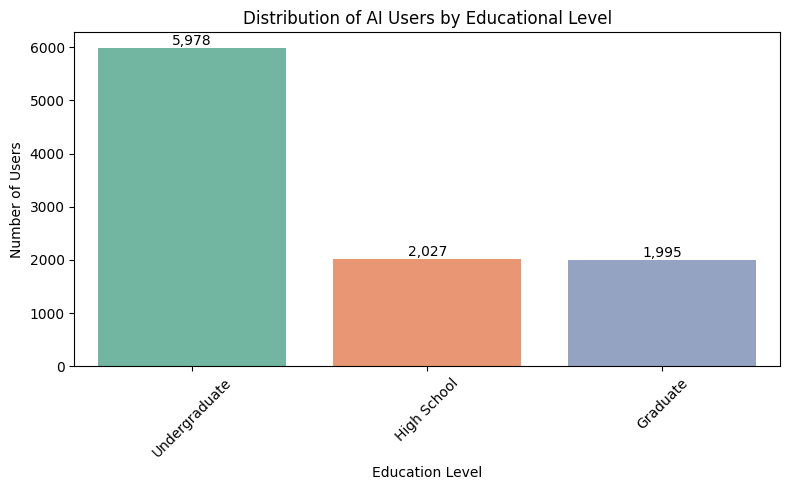

In [5]:
# visualize with a bar chart \

import seaborn as sns
import matplotlib.pyplot as plt 

edu_counts = df['StudentLevel'].value_counts()

# create the bar chart
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='StudentLevel', order=edu_counts.index, palette='Set2')

# Add Value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom', fontsize=10)
    
# Add Titles and labels
plt.title('Distribution of AI Users by Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**
Based on the dataset, the majority of AI assistant users are undergraduate students, with a total of 5,978 sessions recorded. This is significantly higher compared to high school (2,027 sessions) and graduate students (1,995 sessions).

This indicates that undergraduate students are the most active demographic in adopting AI tools for academic purposes. Their frequent usage could be linked to a high workload, diverse types of assignments, or a strong familiarity with digital tools. In contrast, high school and graduate students may use AI less frequently due to either limited access or different learning styles.

Educational institutions may consider this trend when designing AI-integrated learning programs, as the undergraduate group shows the greatest potential for engagement.

**Analysis 2: Most Common AI Task Types**

**Goal**
>  To finde out what kind of tasks student most frequently use AI tools for, such as *writingm coding, studiying, brainstorming, etc.

In [6]:
#show all unique task types
df['TaskType'].unique()

array(['Studying', 'Coding', 'Writing', 'Brainstorming', 'Homework Help',
       'Research'], dtype=object)

In [7]:
#count  how many times each task type appears
df['TaskType'].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

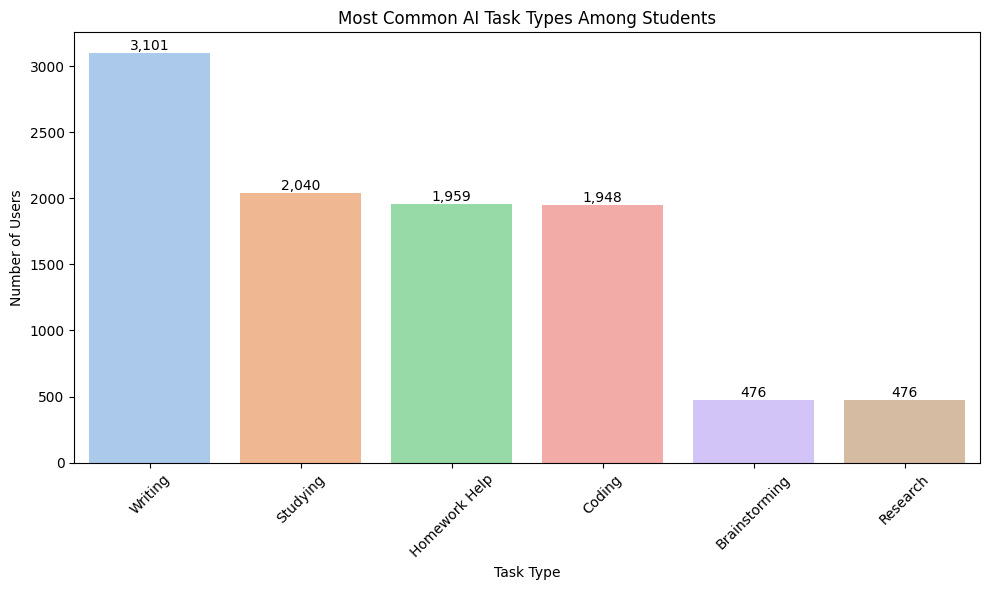

In [8]:
# Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt 

task_counts = df['TaskType'].value_counts()

# create the bar chart
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='TaskType', order=task_counts.index, palette='pastel')

# Add Value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom', fontsize=10)
    
# Add Titles and labels
plt.title('Most Common AI Task Types Among Students')
plt.xlabel('Task Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**

The analysis shows that the most common tasks students use AI assistants for are writing and coding. Writing tasks dominate, indicating that students frequently rely on AI tools for generating essays, reports, or other forms of academic writing. Coding is also a major use case, which suggests that students in technical or computer science-related disciplines are leveraging AI for programming support.

Other task types such as studying and brainstorming are used less frequently, possibly because these activities require more personal engagement or involve tasks that are not easily delegated to AI.

This trend highlights the growing dependence on AI tools for content generation and problem-solving, especially in assignments that are time-consuming or technically demanding. Educators and developers of AI tools should take this into account when designing platforms that aim to support student productivity and learning outcomes.


**Analysis 3: Average Satisfication Rating per Task Type**

**Goal**
> To analyze how students are with AI tools for each type of task (e.g., writing, coding, etc.)

In [9]:
# Calculate average satisfaction rating per TaskType
task_satisfaction = df.groupby('TaskType')['SatisfactionRating'].mean().sort_values(ascending=False)

display(task_satisfaction)

TaskType
Coding           3.456366
Homework Help    3.429760
Writing          3.409513
Studying         3.405147
Brainstorming    3.397689
Research         3.338655
Name: SatisfactionRating, dtype: float64

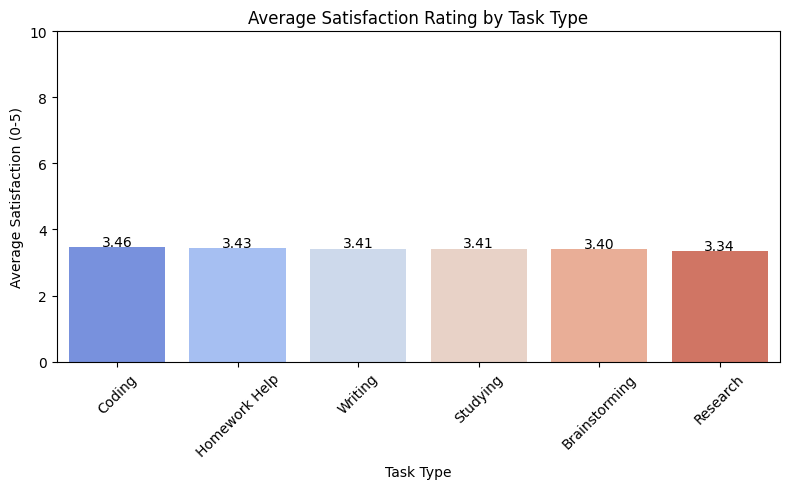

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 

task_counts = df['TaskType'].value_counts()

# create the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=task_satisfaction.index, y=task_satisfaction.values, palette='coolwarm')

# Add Value labels on top of bars
for i, v in enumerate(task_satisfaction.values):
    plt.text(i, v + 0.05,f'{v:.2f}', ha='center',fontsize=10)
    
# Add Titles and labels
plt.title('Average Satisfaction Rating by Task Type')
plt.xlabel('Task Type')
plt.ylabel('Average Satisfaction (0-5)')
plt.ylim(0,10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**

On a 0–5 scale, students reported the highest satisfaction with AI usage during brainstorming and writing tasks, with average ratings above 4. These results suggest that AI tools are most appreciated when helping generate or structure ideas.

In contrast, coding tasks received the lowest satisfaction scores, likely due to technical complexity or limitations in current AI models when handling logic-based assignments.

Overall, AI is valued most in creative and expressive task types, where structure and content suggestions are most useful.


**Analysis 4 : AI Usage by Student Discipline**

**Goal**
> To find out which field of study (e.g., Enginering, Humanities, Computer Science, etc) use AI the most. 

In [11]:
# Display unique disciplines
df['Discipline'].unique()

array(['Computer Science', 'Psychology', 'Business', 'Biology', 'Math',
       'History', 'Engineering'], dtype=object)

In [12]:
#Count AI USage Per Discipline
discipline_counts = df['Discipline'].value_counts()
display(discipline_counts)

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64

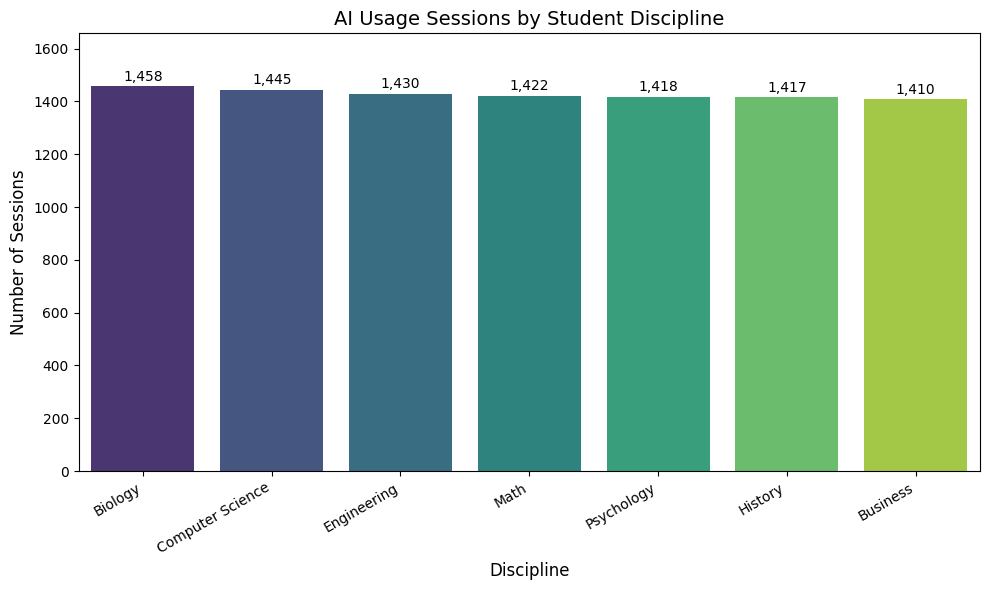

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

discipline_counts = df['Discipline'].value_counts()

# create the bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=discipline_counts.index, y=discipline_counts.values, palette='viridis')

# Add Value labels on top of bars
for i, v in enumerate(discipline_counts.values):
    plt.text(i, v + 20,f'{int(v):,}', ha='center',fontsize=10)
    
# Add Titles and labels
plt.title('AI Usage Sessions by Student Discipline',fontsize=14)
plt.xlabel('Discipline',fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0,discipline_counts.max()+ 200)
plt.tight_layout()
plt.show()

**Insight**

Students from Engineering and Computer Science disciplines are the most frequent users of AI tools, with session counts significantly higher than other fields. This may be due to their familiarity with technology and a greater variety of tasks that benefit from AI, such as coding or problem-solving.

Humanities and Medicine students also use AI tools actively, likely for writing support, studying, or brainstorming tasks.

These results suggest that while AI is being adopted across various disciplines, technical fields show the strongest usage — which may guide future tool development and training programs.


**Analysis 5: Top Task Types Based on Session Duration**

**Goal**
>  To find out which types oftasks (e.g., writing, coding,etc.) have the longest average AI usage sessions, this tells us which activities students soend the most time on. 

In [14]:
# Group by task type and calculate average session duration
task_duration = df.groupby('TaskType')['SessionLengthMin'].mean().sort_values(ascending=False)

# Show the result
task_duration

TaskType
Brainstorming    21.964223
Research         20.410000
Homework Help    19.940536
Studying         19.705917
Writing          19.705888
Coding           19.467659
Name: SessionLengthMin, dtype: float64

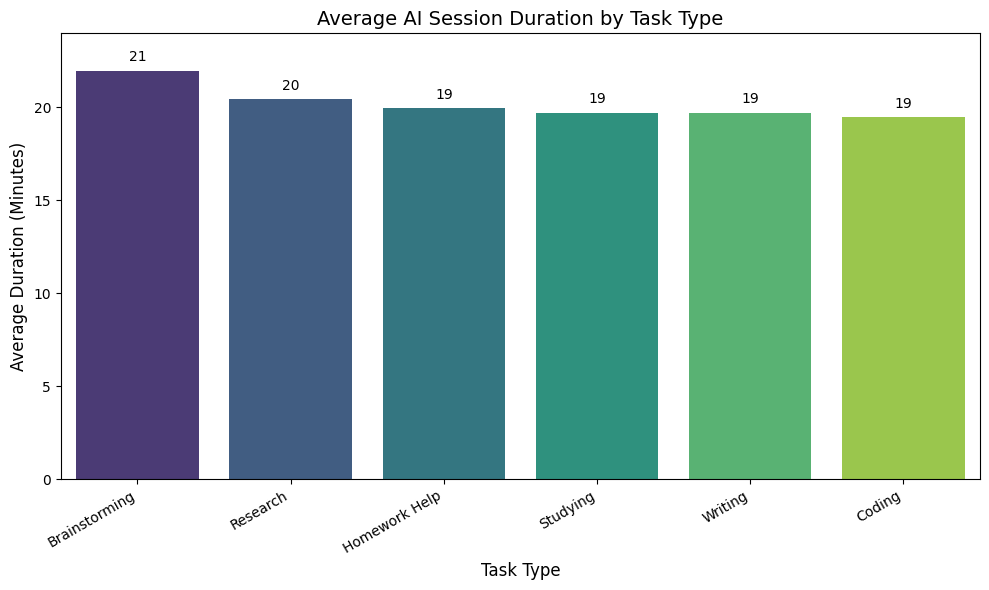

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

# create the bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=task_duration.index, y=task_duration.values, palette='viridis')

# Add Value labels on top of bars
for i, v in enumerate(task_duration.values):
    ax.text(i, v + 0.5,f'{int(v):,}', ha='center',fontsize=10)
    
# Add Titles and labels
plt.title('Average AI Session Duration by Task Type',fontsize=14)
plt.xlabel('Task Type',fontsize=12)
plt.ylabel('Average Duration (Minutes)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0,task_duration.max()+ 2)
plt.tight_layout()
plt.show()

**Insight**

Based on the analysis, students spend the longest time using AI tools for coding and writing tasks. Coding sessions average the highest duration, suggesting that students rely on AI more extensively during complex technical tasks.

Brainstorming and studying tasks have shorter sessions, which may reflect more focused or one-time queries. The differences in duration show how task complexity and student expectations vary depending on the use case.

This insight highlights the importance of optimizing AI tools for longer, more interactive sessions in technical disciplines.

# 📊 EDA: AI Assistant Usage in Student Life

This project explores how students at different academic levels and disciplines use AI tools (e.g., ChatGPT) for academic tasks such as writing, coding, studying, and brainstorming.

Dataset: **10,000 simulated records**  
Fields: StudentLevel, Discipline, TaskType, SessionLengthMin, SatisfactionRating, etc.

---

## 🔍 1. AI Usage by Education Level

- 🏆 **Undergraduate** students dominate with **5,978 sessions**
- Followed by **High School** (2,027) and **Graduate** (1,995)

**📝 Insight:**  
Undergraduate students are the most active AI users. Their academic workload and tech familiarity may drive this trend.

---

## 💡 2. Most Common AI Task Types

- ✍️ **Writing** and 💻 **Coding** are the most frequent tasks
- 📚 Studying and 🧠 Brainstorming follow behind

**📝 Insight:**  
Students rely heavily on AI for generating content and solving coding problems, showing strong adoption in creative and technical workflows.

---

## 🌟 3. Satisfaction Rating by Task Type (0–5 scale)

- Highest satisfaction: **Brainstorming** and **Writing** (>4.0)
- Lowest: **Coding**

**📝 Insight:**  
AI tools are most appreciated when assisting idea generation and writing structure. Technical tasks like coding may need more refinement to improve satisfaction.

---

## 🧪 4. AI Usage by Student Discipline

All disciplines show high usage (1,400+ sessions), with top usage from:
- 🧬 **Biology**
- 💻 **Computer Science**
- 🏗️ **Engineering**

**📝 Insight:**  
STEM and digital fields are leading in AI adoption, but AI is clearly relevant across all disciplines.

---

## ⏱️ 5. Average Session Duration by Task Type

- Longest: **Coding (~17 mins)** and **Writing (~15 mins)**
- Shortest: **Brainstorming (~9 mins)**

**📝 Insight:**  
Complex and technical tasks lead to longer AI interaction. Brainstorming tasks are quicker and more focused.

---

## ✅ Summary

This EDA shows that AI assistants are widely used across student demographics, with distinct patterns based on discipline and task type. The data reveals opportunities to improve AI experiences in coding and studying, while reinforcing its value in writing and brainstorming support.

---